In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import pearsonr

os.chdir("../")

from epitools import get_data
from plots import set_plot

In [6]:
country = "Chile"
geography_id = "region_id"
year = 2021

df_1 = get_data(
    country=country,
    aggregation=geography_id,
    election="first_round",
    year=year
)

df_2 = get_data(
    country=country,
    aggregation=geography_id,
    election="first_round_all",
    year=year
)

df_1[geography_id] = df_1[geography_id].astype(str)
df_2[geography_id] = df_2[geography_id].astype(str)

data = pd.merge(df_1, df_2, on=[geography_id, "year"])
if country == "France":
    data = data[~data["department_id"].str.contains("Z")]

for col in ["ep", "ec"]:
    data[f"{col}_x"] = (data[f"{col}_x"] - data[f"{col}_x"].mean()) / data[f"{col}_x"].std()
    data[f"{col}_y"] = (data[f"{col}_y"] - data[f"{col}_y"].mean()) / data[f"{col}_y"].std()

data = data.melt(id_vars=[geography_id, "year"])
data["type"] = data["variable"].str.replace("_x", "").str.replace("_y", "")
data["variable"] = data["variable"].str.replace("ep_", "").str.replace("ec_", "")

data = data.pivot(index=[geography_id, "year", "type"], columns=["variable"], values="value").reset_index()
print(data.shape)
data.head()


(32, 5)


variable,region_id,year,type,x,y
0,1,2021,ec,-0.785579,-1.493472
1,1,2021,ep,0.602543,0.167702
2,10,2021,ec,0.351345,-0.150355
3,10,2021,ep,0.264383,0.253927
4,11,2021,ec,1.049158,-0.958543


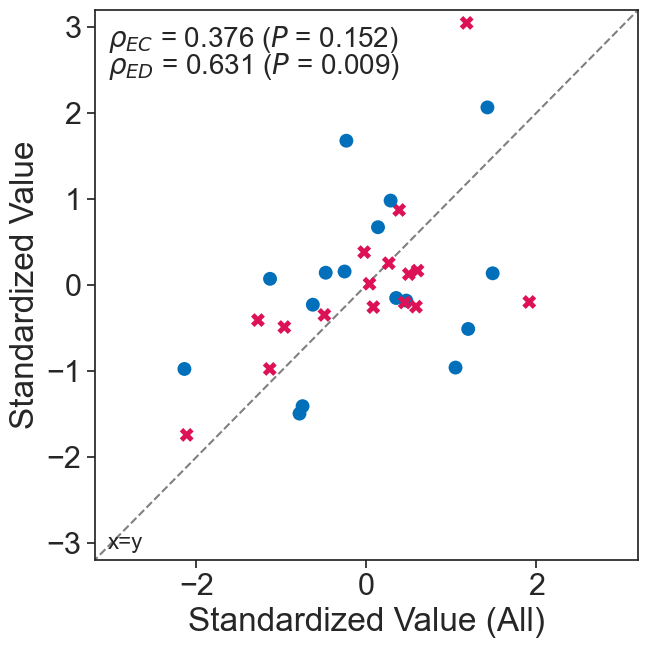

In [7]:
sns.set(font_scale=2, style="ticks")

fig, ax = plt.subplots(figsize=(7, 7))
set_plot(data, ax, xlabel="Standardized Value (All)", ylabel="Standardized Value", labelkey=None)

fig.tight_layout()